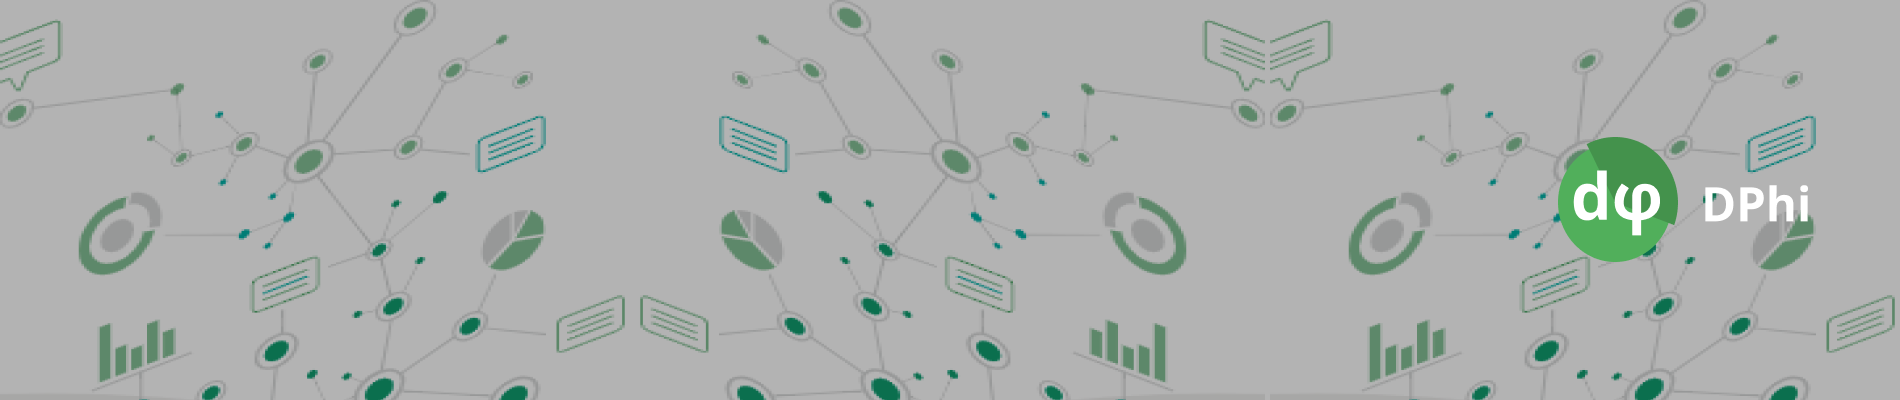

# <p style="text-align:center;font-size:150%;font-family:Roboto;background-color:#a04070;border-radius:50px;font-weight:bold;margin-bottom:0">IITB - DATATHON</p>

<p style="font-family:Roboto;font-size:120%;color:#a04070;">As a part of the bootcamp organized by IITB in collaboration with Dphi this is the graded Datathon to showcase the learnings of this Bootcamp. In this Datathon our task is to predict the political party that a family likes based on some features regarding physical, financial and educational background.</p> 

<!-- <a id='top'></a> -->
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#a04070;font-family:Roboto;font-size:160%;text-align:center;border-radius:50px;">TABLE OF CONTENTS</p>   
    
* [1. Importing Libraries](#1)
    
* [2. Exploratory Data Analysis](#2)
    
* [3. Machine Learning Model](#3)
    
* [4. Predictions](#4) 
    
* [5. The End](#5) 

<a id="1"></a>
# <p style="background-color:#a04070;font-family:Roboto;font-size:120%;text-align:center;border-radius:50px;margin-bottom:0">IMPORTING LIBRARIES</p>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

\<a id="2"></a>
# <p style="background-color:#a04070;font-family:Roboto;font-size:140%;text-align:center;border-radius:50px;margin-bottom:0">Exploratory Data Analysis</p>

In [ ]:
df  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/tax_payers/train_set_label.csv")
df = df.rename(columns={'Unnamed: 0':'ID'})

In [ ]:
print(df.shape)
df.head()

(803, 11)


,ID,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
0,61,183414,-12402,1,2,28,1,0,0,1,Democrat
1,501,129786,700251,2,5,63,3,0,0,0,Republican
2,658,268343,493411,2,4,44,1,1,0,1,Independent
3,703,290506,-433408,1,1,28,5,1,0,1,Republican
4,702,90108,907135,1,3,57,5,1,1,0,Democrat


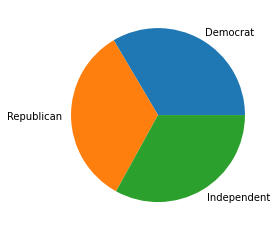

In [ ]:
plt.pie(df['PoliticalParty'].value_counts().values, labels = df['PoliticalParty'].unique())
plt.show() 

<p style="font-family:Roboto;font-size:120%;color:#a04070;">So, the amount of training data provided for each class is equal. So, this means that our model will be able to generalize better on each class.</p>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              803 non-null    int64 
 1   HHI             803 non-null    int64 
 2   HHDL            803 non-null    int64 
 3   Married         803 non-null    int64 
 4   CollegGrads     803 non-null    int64 
 5   AHHAge          803 non-null    int64 
 6   Cars            803 non-null    int64 
 7   Filed in 2017   803 non-null    int64 
 8   Filed in 2016   803 non-null    int64 
 9   Filed in 2015   803 non-null    int64 
 10  PoliticalParty  803 non-null    object
dtypes: int64(10), object(1)
memory usage: 69.1+ KB


<p style="font-family:Roboto;font-size:120%;color:#a04070;">This implies that there are no null values in the given data set.</p>

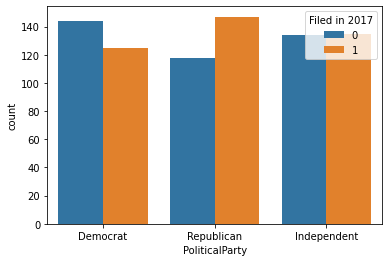

In [ ]:
sb.countplot(hue=df['Filed in 2017'], x=df['PoliticalParty'])
plt.show()

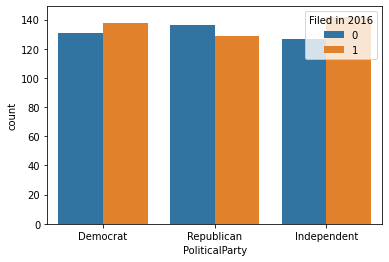

In [ ]:
sb.countplot(hue=df['Filed in 2016'], x=df['PoliticalParty'])
plt.show()

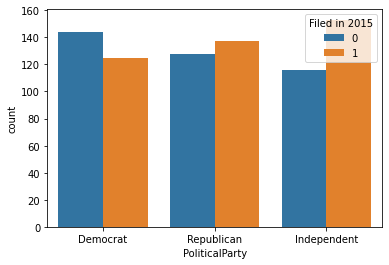

In [ ]:
sb.countplot(hue=df['Filed in 2015'], x=df['PoliticalParty'])
plt.show()

In [ ]:
df.groupby(['PoliticalParty', 'Married']).mean()[['HHI', 'HHDL']]

HHI          HHDL
PoliticalParty Married                             
Democrat       0        154576.979381  30477.886598
               1        138114.720430  -3451.967742
               2        143913.063291 -83651.683544
Independent    0        156734.436170  30307.968085
               1        165414.147727 -41986.761364
               2        154060.505747 -63018.229885
Republican     0        157484.100000   7190.150000
               1        162356.291262 -60729.893204
               2        165444.134146  44567.609756

<p style="font-family:Roboto;font-size:140%;color:#a04070;">Seems like unmarried people remain debt free in their life.</p>

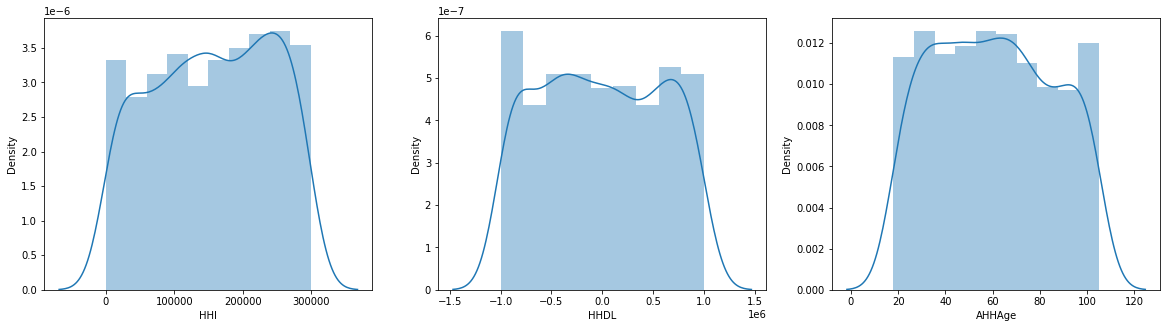

In [ ]:
ord = ['HHI', 'HHDL', 'AHHAge']

plt.subplots(figsize=(20,5))
for i, col in enumerate(ord):
  plt.subplot(1,3,i+1)
  sb.distplot(df[col])
plt.show()

<p style="font-family:Roboto;font-size:140%;color:#a04070;">These distribution plots shows that the distribution of values in the columns with continous values have normal distribution.</p>

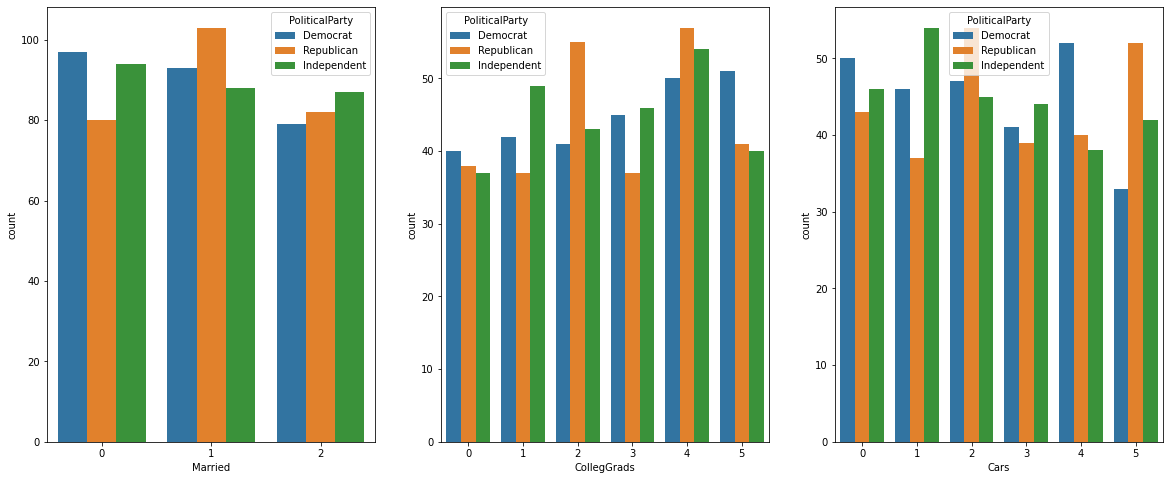

In [ ]:
ord = ['Married', 'CollegGrads', 'Cars']

plt.subplots(figsize=(20,8))
for i, col in enumerate(ord):
  plt.subplot(1,3,i+1)
  sb.countplot(df[col], hue=df['PoliticalParty'])
plt.show()

In [ ]:
df.groupby('CollegGrads').mean()[['HHI', 'HHDL']]

,HHI,HHDL
CollegGrads,,
0,151377.434783,-47556.078261
1,156152.898438,16887.570312
2,168170.467626,-76711.683453
3,157917.843750,56275.234375
4,152016.422360,-34292.875776
5,146428.484848,-294.462121


<p style="font-family:Roboto;font-size:140%;color:#a04070;">Upto grade 2 HHI increases but after that it is decreasing also people who were average students(grade = 3) are performing better in their career and having better financial health as they have high <code>HHI</code> and positive <code>HHDL</code> value.</p>

In [ ]:
df['total'] = df['Filed in 2015'] + df['Filed in 2016'] + df['Filed in 2017']
df.groupby('total').mean()[['HHI', 'HHDL']]

,HHI,HHDL
total,,
0,140412.506024,-97822.939759
1,152288.810631,-28731.232558
2,158830.009174,7718.204893
3,166932.347826,20831.478261


<p style="font-family:Roboto;font-size:140%;color:#a04070;">So, the amount of training data provided for each class is equal. So, this means that our model will be able to generalize better on each class.<p>People who fill the taxes every year has comparitively high HHI and positive HHDL as compare to that of the people who have never filled the taxes.

In [ ]:
df['net'] = df['HHI'] + df['HHDL']
df.groupby('PoliticalParty').mean()['net']

PoliticalParty
Democrat       130983.669145
Independent    135183.174721
Republican     154197.818868
Name: net, dtype: float64

<p style="font-family:Roboto;font-size:120%;color:#a04070;">Net household income of families was higher in the Republican party's rule.</p>

In [ ]:
le = LabelEncoder()
df['PoliticalParty'] = le.fit_transform(df['PoliticalParty'])
labels = le.classes_
labels

array(['Democrat', 'Independent', 'Republican'], dtype=object)

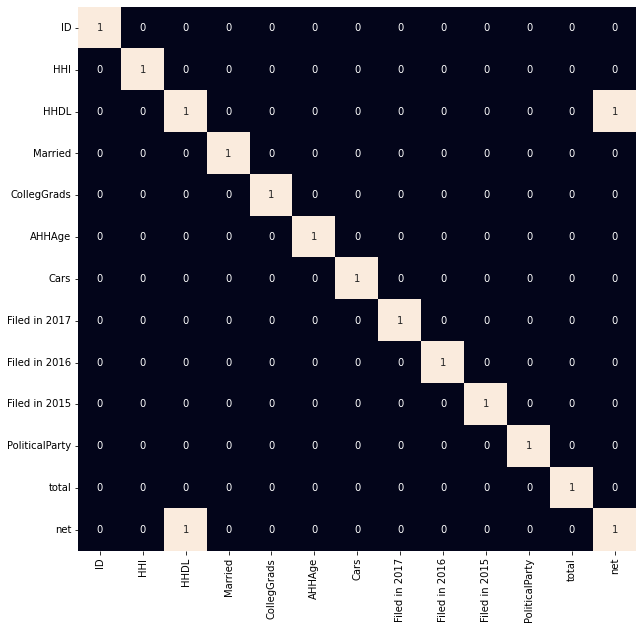

In [ ]:
plt.figure(figsize=(10,10))
sb.heatmap(df.corr() > 0.75, annot=True, cbar=False)
plt.show()

<p style="font-family:Roboto;font-size:120%;color:#a04070;">There are no highly correlated features with the target column so, there is no data leakage.</p>

<a id="3"></a>
# <p style="background-color:#a04070;font-family:Roboto;font-size:140%;text-align:center;border-radius:50px;margin-bottom:0">Machine Learning Model</p>
<p style="font-family:Roboto;font-size:140%;color:#a04070;">Now we will use some of the self model for the classification and generalize over the training data. To select which model is able to recognize the pattern better we will split the trainign data into training and the validation data.</p>

In [ ]:
features = df.drop(['ID', 'PoliticalParty'], axis=1)
target = df['PoliticalParty']

# Split to evaluate the performance of the model.
X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size = 0.15, random_state=10)
print(X_train.shape, X_val.shape)


# Normalizing the data before training a model by using on it.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

(682, 11) (121, 11)


In [ ]:
models = [LogisticRegression(), XGBClassifier(max_depth=2, n_estimators=100),\
          SVC(kernel='poly'), SVC(kernel='rbf'), KNeighborsClassifier(n_neighbors=3)]

for i in range(5):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.accuracy_score(Y_train, models[i].predict(X_train)))
  print('Validation Accuracy : ', metrics.accuracy_score(Y_val, models[i].predict(X_val)))
  print()

LogisticRegression() : 
Training Accuracy :  0.3914956011730205
Validation Accuracy :  0.33884297520661155

XGBClassifier(max_depth=2, objective='multi:softprob') : 
Training Accuracy :  0.6011730205278593
Validation Accuracy :  0.35537190082644626

SVC(kernel='poly') : 
Training Accuracy :  0.6011730205278593
Validation Accuracy :  0.36363636363636365

SVC() : 
Training Accuracy :  0.6055718475073314
Validation Accuracy :  0.2644628099173554

KNeighborsClassifier(n_neighbors=3) : 
Training Accuracy :  0.6422287390029325
Validation Accuracy :  0.4214876033057851



<p style="font-family:Roboto;font-size:120%;color:#a04070;">Only the KNeighborsClassifier model have higher training as well as higher validation accuracy so, we will choose this model to predict the political party for the test data.</p>

<a id="4"></a>
# <p style="background-color:#a04070;font-family:Roboto;font-size:140%;text-align:center;border-radius:50px;margin-bottom:0">Predictions</p>
<p style="font-family:Roboto;font-size:120%;color:#a04070;">We added some features in the training data. So, those features will be added in the testing data as well and in the same order. After this normalization of the data by using the mean and the standard deviation of the training data.</p>

In [ ]:
test = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/tax_payers/test_set_label.csv')
test = test.rename(columns={'Unnamed: 0':'ID'})
test.head()

,ID,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015
0,17,253274,-633752,2,1,94,3,0,1,1
1,590,47107,322850,0,1,30,2,1,1,0
2,224,111874,300583,0,2,46,3,0,1,1
3,960,96670,107419,0,3,77,5,0,0,0
4,57,128669,341273,0,0,92,4,1,1,1


In [ ]:
# Adding the features that has been added in the training data.
test['total'] = test['Filed in 2015'] + test['Filed in 2016'] + test['Filed in 2017']
test['net'] = test['HHI'] + test['HHDL']

In [ ]:
# Test data preprocessing.
test = test.drop(['ID'], axis=1)
test = scaler.transform(test)

In [ ]:
# Predictions of class by using the suitable and high performance model.
predictions = models[4].predict(test)

In [ ]:
pred = []
for idx in predictions:
  pred.append(labels[predictions[idx]])
ss = pd.DataFrame({'prediction':pred})
ss.head()

,prediction
0,Democrat
1,Democrat
2,Republican
3,Democrat
4,Republican


In [ ]:
ss.to_csv('Submission.csv', index=False)

from google.colab import files
files.download('Submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<a id="5"></a>
# <p style="background-color:#a04070;font-family:Roboto;font-size:140%;text-align:center;border-radius:50px;margin-bottom:0">The End</p>
<p style="font-family:Roboto;font-size:120%;color:#a04070;">None of the machine learning model was able to achieve accuracy more than 80% may be we can improve on the current performance by doing some data engineering. Also may be neural networks will be able to recognize complex patterns in the data. But it is also possible that these features are not sufficient to build a high accuracy model which can predict the party liked by a family.</p>